# Prediciting a startup acquisition status

In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
db = pd.read_csv('companies.csv')

In [3]:
db.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [4]:
db.shape

(196553, 44)

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [6]:
db.isnull().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

### Data cleaning


In [7]:
#drop_list=db.columns[db.isnull().mean()*100>=98].tolist()


In [8]:
db.isnull().mean()*100

id                       0.000000
Unnamed: 0.1             0.000000
entity_type              0.000000
entity_id                0.000000
parent_id              100.000000
name                     0.011193
normalized_name          0.013228
permalink                0.000000
category_code           37.326828
status                   0.000000
founded_at              53.586564
closed_at               98.667026
domain                  35.617874
homepage_url            35.617874
twitter_username        58.997828
logo_url                43.979486
logo_width              43.979486
logo_height             43.979486
short_description       96.371971
description             53.168865
overview                35.401139
tag_list                58.559778
country_code            55.233448
state_code              74.102151
city                    57.319400
region                   0.000000
first_investment_at     98.685851
last_investment_at      98.685851
investment_rounds       98.681780
invested_compa

In [9]:
#db.drop(columns=drop_list,inplace=True)

In [10]:
db

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,2007-01-01,NaN,webgility.com,http://www.webgility.com,webgility,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,54.0,NaN,eCommerce automation & integration,Webgility is the leading provider in QuickBook...,"ecommerce, quickbooks-sync, intuit-gold-partne...",USA,CA,San Francisco,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,2007-11-01,NaN,fohboh.com,http://www.fohboh.com,fohboh,http://s3.amazonaws.com/crunchbase_prod_assets...,518.0,267.0,NaN,Foodservice industry social-busi network,"Online B2B Community - Food, Tech & Media\r\nW...","restaurant-industry-social-network, restaurat-...",USA,CA,San Jose,SF Bay,NaN,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:

companies id number will surely not affect its status so we will drop these columns

In [11]:
db.drop(columns=['id','Unnamed: 0.1','entity_id','parent_id'],inplace=True)

we have some more columns  like colunm name and normalized name which contain same data so will drop these columns

In [12]:
db.drop(columns=['normalized_name','name'],inplace=True)

droping data about logo,domain names,urls 

In [13]:
db.drop(columns=['permalink','domain','homepage_url','logo_url','twitter_username'],inplace=True)

In [14]:
db

,entity_type,category_code,status,founded_at,closed_at,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,Company,web,operating,2005-10-17,NaN,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,Company,games_video,acquired,NaN,NaN,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,Company,games_video,acquired,NaN,NaN,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,Company,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,Company,games_video,operating,2008-07-26,NaN,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,Company,ecommerce,operating,2007-01-01,NaN,200.0,54.0,NaN,eCommerce automation & integration,Webgility is the leading provider in QuickBook...,"ecommerce, quickbooks-sync, intuit-gold-partne...",USA,CA,San Francisco,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,Company,public_relations,operating,2007-11-01,NaN,518.0,267.0,NaN,Foodservice industry social-busi network,"Online B2B Community - Food, Tech & Media\r\nW...","restaurant-industry-social-network, restaurat-...",USA,CA,San Jose,SF Bay,NaN,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,Company,consulting,operating,1959-01-01,NaN,60.0,33.0,NaN,IT services,CSC is a leading global IT services company. C...,NaN,USA,VA,Falls Church,Washington DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,Company,search,operating,2008-07-01,NaN,230.0,86.0,NaN,NaN,Top-candidate,"resumes, resume-database, resume-search, recru...",USA,CA,Los Angeles,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


we will check the count of values in all column now

In [15]:
db.entity_type.unique()


array(['Company'], dtype=object)

As entity_type only contains one value we can drop it

In [16]:
db.drop(columns='entity_type',inplace=True)

In [17]:
db.category_code.value_counts()

software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
hospitality           768
news                  768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                281
nonprofit   

In [18]:
db.status.value_counts()

operating    183441
acquired       9394
closed         2584
ipo            1134
Name: status, dtype: int64

In [19]:
#db.country_code.value_counts()

In [20]:
db.created_by.value_counts()

dhawalarco       10005
timircha          7810
vinthanedar       6789
arco              6641
arun              5337
                 ...  
tgsc                 1
curtisstevens        1
codydeegan           1
patrickwalsh         1
rchowdhury           1
Name: created_by, Length: 55329, dtype: int64

In [21]:
#dropping created by and 'updated_at as these column are crunchbase info which wont be usefull in our data
db.drop(columns=['created_by','updated_at'],inplace=True)

In [22]:
db.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'logo_width',
       'logo_height', 'short_description', 'description', 'overview',
       'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_at', 'lat',
       'lng', 'ROI'],
      dtype='object')

In [23]:
#filling null values in milestone column by last milestone and first milestone
db['first_milestone_at']=pd.to_datetime(db['first_milestone_at'])

In [24]:
#converting all columns with year to datetime value 
db['last_milestone_at']=pd.to_datetime(db['last_milestone_at'])
db['last_funding_at']=pd.to_datetime(db['last_funding_at'])
db['first_funding_at']=pd.to_datetime(db['first_funding_at'])
db['last_investment_at']=pd.to_datetime(db['last_investment_at'])
db['first_investment_at']=pd.to_datetime(db['first_investment_at'])

<AxesSubplot:xlabel='milestones', ylabel='count'>

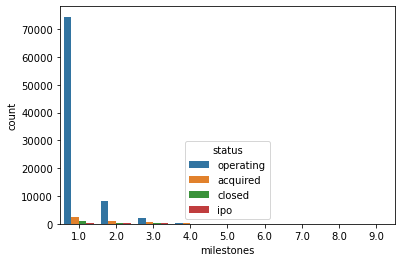

In [25]:
#Milestone can be a import feature which can help us to determine the success of a company
db['milestones'].max()
db['milestones'].min()
db['milestones'].mean()
sns.countplot(x='milestones',hue=db['status'],data=db)

In [26]:
db['milestones'].value_counts()

1.0    78045
2.0    10043
3.0     2888
4.0      506
5.0      157
6.0       46
7.0        9
8.0        4
9.0        1
Name: milestones, dtype: int64

In [27]:
db['milestones'].isnull().sum()

104854

In [28]:
db['milestones'].fillna(0,inplace=True)
db['first_milestone_at'].fillna(0,inplace=True)
db['last_milestone_at'].fillna(0,inplace=True)
milestone=list(db['milestones'])
first_milestone_at=list(db['first_milestone_at'])
last_milestone_at=list(db['last_milestone_at'])
for i in range(len(milestone)):
    if milestone[i]==0:
        if last_milestone_at[i]==first_milestone_at[i] and first_milestone_at[i]==0:
            milestone[i]=0
        elif last_milestone_at[i]==first_milestone_at:
             milestone[i]=1
        elif last_milestone_at[i]==0:
             milestone[i]=1
        elif first_milestone_at[0]==0:       
             milestone[i]=1
        else:
             milestone[i]=2
db['milestones']=milestone                

In [29]:
#Now we can drop last_milestone_at and first_milestone_at 
db.drop(columns=['first_milestone_at','last_milestone_at'],inplace=True)


In [30]:
db

,category_code,status,founded_at,closed_at,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,milestones,relationships,created_at,lat,lng,ROI
0,web,operating,2005-10-17,NaN,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaT,NaT,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,5.0,17.0,2007-05-25 06:51:27,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,0.0,6.0,2007-05-31 21:11:51,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,4.0,12.0,2007-08-06 23:52:45,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,0.0,NaN,2008-08-24 16:51:57,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,0.0,NaN,2008-08-24 17:10:34,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,200.0,54.0,NaN,eCommerce automation & integration,Webgility is the leading provider in QuickBook...,"ecommerce, quickbooks-sync, intuit-gold-partne...",USA,CA,San Francisco,SF Bay,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,2.0,5.0,2011-09-06 23:17:56,37.774929,-122.419415,NaN
196549,public_relations,operating,2007-11-01,NaN,518.0,267.0,NaN,Foodservice industry social-busi network,"Online B2B Community - Food, Tech & Media\r\nW...","restaurant-industry-social-network, restaurat-...",USA,CA,San Jose,SF Bay,NaT,NaT,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,1.0,14.0,2008-08-24 15:46:26,37.338208,-121.886329,NaN
196550,consulting,operating,1959-01-01,NaN,60.0,33.0,NaN,IT services,CSC is a leading global IT services company. C...,NaN,USA,VA,Falls Church,Washington DC,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,3.0,44.0,2008-08-24 15:46:58,38.882334,-77.171091,NaN
196551,search,operating,2008-07-01,NaN,230.0,86.0,NaN,NaN,Top-candidate,"resumes, resume-database, resume-search, recru...",USA,CA,Los Angeles,Los Angeles,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,0.0,1.0,2008-08-24 16:00:22,34.052234,-118.243685,NaN


In [31]:
db['founded_at']=pd.to_datetime(db['founded_at'])
db['closed_at']=pd.to_datetime(db['closed_at'])

In [32]:
db['founded_at'].fillna(db['created_at'],inplace=True)

In [33]:
db['closed_at'].fillna(db['founded_at'].max(),inplace=True)

In [34]:
db['closed_at']

0        2014-10-01
1        2014-10-01
2        2014-10-01
3        2014-10-01
4        2014-10-01
            ...    
196548   2014-10-01
196549   2014-10-01
196550   2014-10-01
196551   2014-10-01
196552   2014-10-01
Name: closed_at, Length: 196553, dtype: datetime64[ns]

In [35]:
#creating active days columns
db['active_days']=(db['closed_at']-db['founded_at']).dt.days


In [36]:
#checking datatypes of column
db

,category_code,status,founded_at,closed_at,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,milestones,relationships,created_at,lat,lng,ROI,active_days
0,web,operating,2005-10-17 00:00:00,2014-10-01,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaT,NaT,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,5.0,17.0,2007-05-25 06:51:27,47.606209,-122.332071,15.5,3271
1,games_video,acquired,2007-05-31 21:11:51,2014-10-01,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,0.0,6.0,2007-05-31 21:11:51,34.021122,-118.396467,NaN,2679
2,games_video,acquired,2007-08-06 23:52:45,2014-10-01,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,4.0,12.0,2007-08-06 23:52:45,37.562992,-122.325525,NaN,2612
3,network_hosting,operating,2008-07-26 00:00:00,2014-10-01,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,0.0,NaN,2008-08-24 16:51:57,NaN,NaN,NaN,2258
4,games_video,operating,2008-07-26 00:00:00,2014-10-01,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,0.0,NaN,2008-08-24 17:10:34,NaN,NaN,NaN,2258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01 00:00:00,2014-10-01,200.0,54.0,NaN,eCommerce automation & integration,Webgility is the leading provider in QuickBook...,"ecommerce, quickbooks-sync, intuit-gold-partne...",USA,CA,San Francisco,SF Bay,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,2.0,5.0,2011-09-06 23:17:56,37.774929,-122.419415,NaN,2830
196549,public_relations,operating,2007-11-01 00:00:00,2014-10-01,518.0,267.0,NaN,Foodservice industry social-busi network,"Online B2B Community - Food, Tech & Media\r\nW...","restaurant-industry-social-network, restaurat-...",USA,CA,San Jose,SF Bay,NaT,NaT,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,1.0,14.0,2008-08-24 15:46:26,37.338208,-121.886329,NaN,2526
196550,consulting,operating,1959-01-01 00:00:00,2014-10-01,60.0,33.0,NaN,IT services,CSC is a leading global IT services company. C...,NaN,USA,VA,Falls Church,Washington DC,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,3.0,44.0,2008-08-24 15:46:58,38.882334,-77.171091,NaN,20362
196551,search,operating,2008-07-01 00:00:00,2014-10-01,230.0,86.0,NaN,NaN,Top-candidate,"resumes, resume-database, resume-search, recru...",USA,CA,Los Angeles,Los Angeles,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,0.0,1.0,2008-08-24 16:00:22,34.052234,-118.243685,NaN,2283


In [37]:
#we want to calculate active days so for that we will replace the null values in closed at the with default value that is maxmimu founded date value
status=list(db['status'])
isclosed=list()
for i in range(len(status)):
    if status[i]=='closed':
        isclosed.append(1)
    else:
         isclosed.append(0)
db['isclosed']=isclosed       

In [38]:
db.relationships.mean()

2.8520672183361997

In [39]:
#replacing the null values in relationships column by mean
db['relationships'].mean()
#mean value is 2.85 but relation column contain whole number so we are rounding out mean vakue and then placing
db['relationships'].fillna(3,inplace=True)


In [40]:
#dropping columns with more than
to_drop=db.columns[db.isnull().mean()*100>=98]
db.drop(columns=to_drop,inplace=True)

In [41]:
#as we have already taken out active days count we can drop founded at and closed at column
db.drop(columns=['founded_at','closed_at'],inplace=True)

In [42]:
#we have logo width and height their are some facts which support that creativity in logo can attract more benefit for company so we will murge these columns and get area of logo

db['logo_width'].fillna(db['logo_width'].mean(),inplace=True)
db['logo_height'].fillna(db['logo_height'].mean(),inplace=True)

In [43]:
db['logo_area']=round(db['logo_width']*db['logo_height'],2)

In [44]:
#now we can drop logo width and height
db.drop(columns=['logo_width','logo_height'],inplace=True)

In [45]:
#lets replace the null values in categories with others
db['category_code'].fillna('other',inplace=True)

In [46]:
db[~db['description'].isnull()]['description']

0                      Technology Platform Company
8                                     Online Media
9                      SaaS Idea Management System
10                               random video chat
11          Sitio de citas para casados y casadas.
                            ...                   
196547                              Thought Engine
196548          eCommerce automation & integration
196549    Foodservice industry social-busi network
196550                                 IT services
196552                     Online fashon community
Name: description, Length: 92048, dtype: object

### Now we will make use of our columns which contains textual value and we will extract values from them using tdifvectorizer

we will make use of 4 columns which are short_description,description,overview,tag_list

In [47]:
#replacing null values in these column by empty string
db['short_description'].fillna('',inplace=True)
db['description'].fillna('',inplace=True)
db['overview'].fillna('',inplace=True)
db['tag_list'].fillna('',inplace=True)

In [48]:
db['tags']=db['short_description']+" "+db['description']+" "+db['overview']+" "+db['tag_list']

In [49]:
db.drop(columns=['short_description','description','overview','tag_list'],inplace=True)

In [50]:
#importing libraries for stemming and tdif vectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [53]:
 stemmer=PorterStemmer()

In [54]:
def func(content):
    stemmed_content=re.sub('[a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.strip()
    stemmed_content=stemmed_content.split()
    stemmed_content=[stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)

In [55]:
tags=list(db['tags'])

In [56]:
for i in range(len(tags)):
    tags[i]=re.sub('[^a-zA-Z]',' ',tags[i])

In [57]:
for i in range(len(tags)):
    tags[i]=tags[i].lower()
    tags[i]=tags[i].strip()
    tags[i]=tags[i].split()

In [58]:
tags

[['technology',
  'platform',
  'company',
  'wetpaint',
  'is',
  'a',
  'technology',
  'platform',
  'company',
  'that',
  'uses',
  'its',
  'proprietary',
  'state',
  'of',
  'the',
  'art',
  'technology',
  'and',
  'expertise',
  'in',
  'social',
  'media',
  'to',
  'build',
  'and',
  'monetize',
  'audiences',
  'for',
  'digital',
  'publishers',
  'wetpaint',
  'wiki',
  'seattle',
  'elowitz',
  'media',
  'industry',
  'media',
  'platform',
  'social',
  'distribution',
  'system'],
 ['flektor',
  'is',
  'a',
  'rich',
  'media',
  'mash',
  'up',
  'platform',
  'that',
  'enables',
  'consumers',
  'to',
  'create',
  'remix',
  'and',
  'share',
  'photos',
  'and',
  'videos',
  'on',
  'the',
  'internet',
  'without',
  'the',
  'need',
  'for',
  'advanced',
  'video',
  'editing',
  'skills',
  'or',
  'software',
  'fox',
  'interactive',
  'media',
  'a',
  'division',
  'of',
  'news',
  'corporation',
  'announced',
  'that',
  'it',
  'had',
  'complete

In [59]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [60]:
from geopy.geocoders import ArcGIS


In [61]:
loc=ArcGIS()

In [62]:
lat, lon = 37.7749, -122.4194
loc.geocode(db['region'][0])

Location(Seattle, Washington, (47.60357000000005, -122.32944999999995, 0.0))

In [63]:
db.columns

Index(['category_code', 'status', 'country_code', 'state_code', 'city',
       'region', 'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'created_at', 'lat',
       'lng', 'active_days', 'isclosed', 'logo_area', 'tags'],
      dtype='object')

we will be focusing on 'country_code', 'state_code', 'city','region'

In [64]:
db['state_code'].unique()

array(['WA', 'CA', nan, 'NY', 'NM', 'TX', 'OH', 'NJ', 'IL', 'MA', 'NC',
       'CT', 'PA', 'NH', 'MI', 'AZ', 'TN', 'GA', 'FL', 'MD', 'UT', 'OR',
       'MO', 'AR', 'CO', 'KS', 'MN', 'NV', 'ID', 'IN', 'IA', 'VA', 'KY',
       'LA', 'HI', 'WV', 'WI', 'SC', 'NE', 'DE', 'DC', 'AL', 'VT', 'RI',
       'OK', 'ME', 'MS', 'MT', 'SD', 'ND', 'AK', 'WY'], dtype=object)

In [65]:
db['region'].nunique()

5847

In [66]:
db['region'].value_counts()

unknown           109866
SF Bay             10173
New York            5174
London              4065
Los Angeles         4057
                   ...  
Hersham                1
Harwell                1
Puerto Andratx         1
Paarl                  1
D.I.Khan               1
Name: region, Length: 5847, dtype: int64

In [67]:
db['country_code'].fillna('unknown',inplace=True)
db['state_code'].fillna('unknown',inplace=True)
db['city'].fillna('unknown',inplace=True)

In [68]:
db[db['region']=='unknown'].isnull().mean()*100

category_code         0.000000
status                0.000000
country_code          0.000000
state_code            0.000000
city                  0.000000
region                0.000000
first_funding_at     97.717219
last_funding_at      97.717219
funding_rounds       97.685362
funding_total_usd    98.229662
milestones            0.000000
relationships         0.000000
created_at            0.000000
lat                  98.820381
lng                  98.820381
active_days           0.000000
isclosed              0.000000
logo_area             0.000000
tags                  0.000000
dtype: float64

In [69]:
#we are dropping lattitude and logititude as we have enough values in region and country and state
db.drop(columns=['lat','lng'],inplace=True)


In [70]:
#checking first_funding_at column
db.groupby(['funding_rounds']).mean()


,funding_total_usd,milestones,relationships,active_days,isclosed,logo_area
funding_rounds,,,,,,
1.0,7.572699e+06,0.652528,3.544025,2260.370702,0.076264,207235.222114
2.0,1.413339e+07,1.090687,5.550309,2497.932758,0.058938,259274.145871
3.0,2.223235e+07,1.422239,7.350113,2844.800526,0.034936,230132.456938
4.0,3.967995e+07,1.599507,9.475329,3025.798520,0.034539,274133.244597
5.0,5.660926e+07,1.773333,11.733333,3193.258333,0.023333,171125.606083
6.0,7.529329e+07,2.012048,14.084337,3439.927711,0.012048,174819.056225
7.0,1.041997e+08,2.108844,14.319728,3593.863946,0.047619,130834.639456
8.0,1.177739e+08,2.134328,17.492537,3455.850746,0.029851,96002.820896
9.0,2.065412e+08,2.456522,18.630435,3611.478261,0.000000,185982.630435


In [71]:
mean=db['funding_total_usd'].mean()
mean=round(mean,0)
db['funding_total_usd'].fillna(mean,inplace=True)


In [72]:
db['funding_rounds'].mean()
db['funding_rounds'].fillna(2,inplace=True)

In [73]:
#dropping firstfirst_funding_at , last_funding_at ,created_at column
db.drop(columns=['first_funding_at','last_funding_at','created_at'],inplace=True)

In [74]:
db.isnull().mean()*100

category_code        0.0
status               0.0
country_code         0.0
state_code           0.0
city                 0.0
region               0.0
funding_rounds       0.0
funding_total_usd    0.0
milestones           0.0
relationships        0.0
active_days          0.0
isclosed             0.0
logo_area            0.0
tags                 0.0
dtype: float64

## Data visualization
#### we will plotting graph of features with status

now as we have done some data cleaning lets do some visualization
exploring each variable one by one

In [75]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

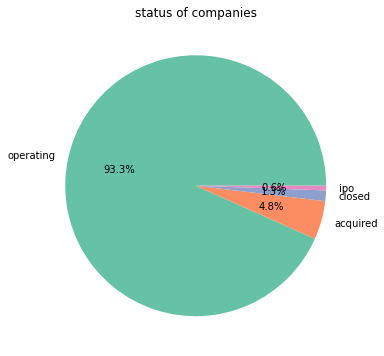

In [76]:
#data visualiztion using matplotlib and seaborn libraries
#define seaborn color palette to use
palette_color = sns.color_palette('Set2')

#plotting data on chart
plt.pie(db.status.value_counts().values, labels = db.status.value_counts().index,colors = palette_color, autopct ='%.1f%%', shadow = False,)
plt.title("status of companies")        
  
# displaying chart
plt.show()


In [77]:
db.status.value_counts()

operating    183441
acquired       9394
closed         2584
ipo            1134
Name: status, dtype: int64

Status distribution 
operating-->93%
acquired-->4.8%
closed-->1.3%
ipo-->0.6%


In [78]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   category_code      196553 non-null  object 
 1   status             196553 non-null  object 
 2   country_code       196553 non-null  object 
 3   state_code         196553 non-null  object 
 4   city               196553 non-null  object 
 5   region             196553 non-null  object 
 6   funding_rounds     196553 non-null  float64
 7   funding_total_usd  196553 non-null  float64
 8   milestones         196553 non-null  float64
 9   relationships      196553 non-null  float64
 10  active_days        196553 non-null  int64  
 11  isclosed           196553 non-null  int64  
 12  logo_area          196553 non-null  float64
 13  tags               196553 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 21.0+ MB


Visualizing categorical columns first created_at,status,country_code,state_code,city,region

In [79]:
#category_code 
name=db.category_code.value_counts().index
value=db.category_code.value_counts().values

([<matplotlib.patches.Wedge at 0x219ba66e610>,
 [Text(-0.36050038683155167, 1.0392494749069165, 'other'),
  Text(-0.537534947779943, -0.9597167185764839, 'software'),
  Text(0.23244226860318679, -1.0751607283409323, 'web'),
  Text(0.7437068684579583, -0.8104937345892671, 'ecommerce'),
  Text(0.9831144788314333, -0.4934429262964456, 'games_video'),
  Text(1.0876058351458446, -0.16466191835609786, 'mobile')],
 [Text(-0.1966365746353918, 0.5668633499492272, '60.63%'),
  Text(-0.29320088060724164, -0.523481846496264, '12.49%'),
  Text(0.1267866919653746, -0.5864513063677812, '10.54%'),
  Text(0.40565829188615904, -0.4420874915941456, '6.32%'),
  Text(0.5362442611807817, -0.2691506870707885, '5.24%'),
  Text(0.5932395464431879, -0.08981559183059883, '4.78%')])

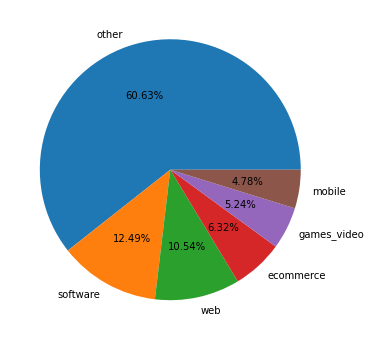

In [80]:
plt.pie(value[:6],labels=name[:6],autopct='%1.2f%%')

60% value---> other

12.5% value---> software

10.5% value---> web

6% value---> ecommerce

5% value---> games

([<matplotlib.patches.Wedge at 0x219ba6c6a90>,
 [Text(-0.18004129854535728, 1.0851659462119616, 'unknown'),
  Text(-0.4451513844920395, -1.0059027014999118, 'USA'),
  Text(0.5527942614846005, -0.9510092031466864, 'GBR'),
  Text(0.7145810759437107, -0.836285768085963, 'IND'),
  Text(0.8112705202347336, -0.7428594369044961, 'CAN'),
  Text(0.8749478890785168, -0.6666829766816067, 'DEU'),
  Text(0.9115742791658293, -0.615656018863861, 'FRA'),
  Text(0.9410117073775963, -0.5696463522031026, 'AUS'),
  Text(0.9634837177575787, -0.5307533566695879, 'ESP'),
  Text(0.981380725419306, -0.49688215079179177, 'IRL'),
  Text(0.997658355382285, -0.46333336371981076, 'ISR'),
  Text(1.0113222738267746, -0.4326976524801615, 'NLD'),
  Text(1.022042973691633, -0.4067286072156275, 'CHN'),
  Text(1.0311144051393173, -0.38314890514549577, 'SWE'),
  Text(1.039031560514162, -0.36112797766928195, 'ITA'),
  Text(1.0457883113716506, -0.34106716024623607, 'FIN'),
  Text(1.0516951060379784, -0.32239324424647253, 'BR

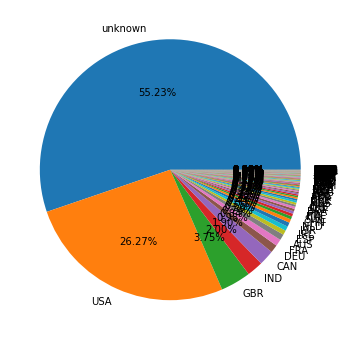

In [81]:
#countrycode
name=db.country_code.value_counts().index
value=db.country_code.value_counts().values

plt.pie(value,labels=name,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x219c2da6c10>,
 [Text(-0.7555712658287671, 0.7994448462864181, 'unknown'),
  Text(0.2262252753764924, -1.076486007703226, 'CA'),
  Text(0.5864518161834681, -0.9306311123614511, 'NY'),
  Text(0.7093675962580726, -0.8407125628768992, 'MA'),
  Text(0.7835059596232775, -0.7720870490008281, 'TX'),
  Text(0.8422469448037839, -0.7075451109072071, 'FL'),
  Text(0.8862419748493139, -0.651594323191346, 'WA'),
  Text(0.9226019547991586, -0.599003867266958, 'IL'),
  Text(0.9508192449578823, -0.5531209301931385, 'PA'),
  Text(0.9721892230865321, -0.514633961679955, 'NJ'),
  Text(0.9908673448769829, -0.4776838963754571, 'CO'),
  Text(1.007965806305417, -0.4404599111372913, 'VA'),
  Text(1.0233637091919374, -0.40339399934669323, 'GA'),
  Text(1.0355620893547497, -0.3709597809617987, 'NC'),
  Text(1.0448027129516269, -0.3440745428085616, 'MD'),
  Text(1.0529138822719033, -0.3183902582038411, 'OH'),
  Text(1.0603376371857731, -0.29271845716881556, 'AZ'),
  Text(1.0667462

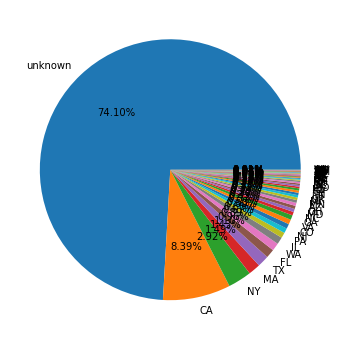

In [82]:
#state_code
name=db.state_code.value_counts().index
value=db.state_code.value_counts().values

plt.pie(value,labels=name,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x219c2e46220>,
 [Text(-0.829423868081891, 0.722534460808669, 'unknown'),
  Text(0.3896306349764263, -1.0286826373026168, 'SF Bay'),
  Text(0.7093185370541574, -0.8407539550851665, 'New York'),
  Text(0.8648844728938703, -0.6796873167472616, 'London'),
  Text(0.9722191577052061, -0.5145774085509195, 'Los Angeles'),
  Text(1.0384485712398253, -0.36280099902007656, 'Boston'),
  Text(1.069714819924105, -0.25634001645224913, 'Washington DC'),
  Text(1.0860080367337637, -0.1748900916280744, 'Seattle'),
  Text(1.0957092557312458, -0.09706300482099102, 'Chicago'),
  Text(1.0996167532748213, -0.029034391974703092, 'San Diego')],
 [Text(-0.4524130189537586, 0.3941097058956376, '77.19%'),
  Text(0.2125258008962325, -0.5610996203468818, '7.15%'),
  Text(0.3869010202113585, -0.45859306641009073, '3.64%'),
  Text(0.4717551670330201, -0.3707385364075972, '2.86%'),
  Text(0.5303013587482941, -0.2806785864823197, '2.85%'),
  Text(0.566426493403541, -0.19789145401095082, 

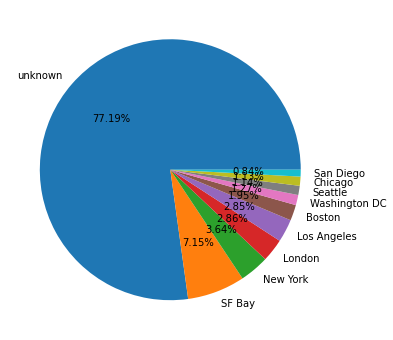

In [83]:
#region
name=db.region.value_counts().index
value=db.region.value_counts().values

plt.pie(value[:10],labels=name[:10],autopct='%1.2f%%')

Now lets check status and other feature


<AxesSubplot:xlabel='category_code', ylabel='count'>

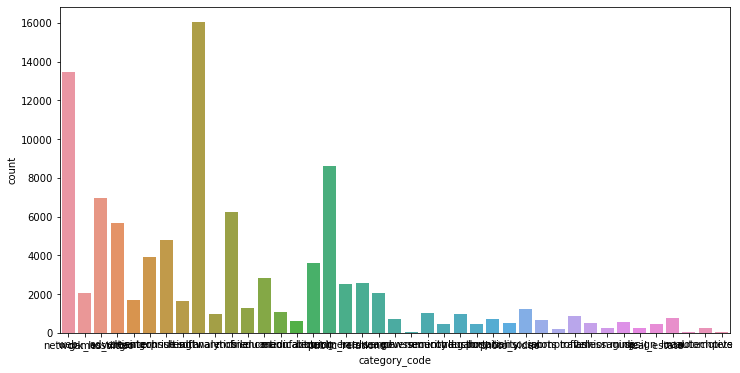

In [84]:
db_operating=db[db['status']=='operating']
db_operating=db_operating[db_operating['category_code']!='other']

sns.countplot(db_operating['category_code'])


In [85]:
db_operating['category_code'].value_counts()

software            16028
web                 13489
ecommerce            8608
games_video          6946
mobile               6225
advertising          5667
consulting           4818
enterprise           3910
biotech              3611
education            2855
hardware             2586
public_relations     2536
search               2057
network_hosting      2053
cleantech            1695
health               1652
finance              1306
social               1230
medical              1098
security             1006
legal                1003
analytics             965
travel                902
local                 781
hospitality           738
news                  724
sports                661
manufacturing         632
music                 556
fashion               538
photo_video           519
transportation        477
real_estate           459
semiconductor         455
automotive            278
design                274
messaging             245
nonprofit             183
nanotech    

category code distribution of companies that our operating and are not others


<AxesSubplot:xlabel='category_code', ylabel='count'>

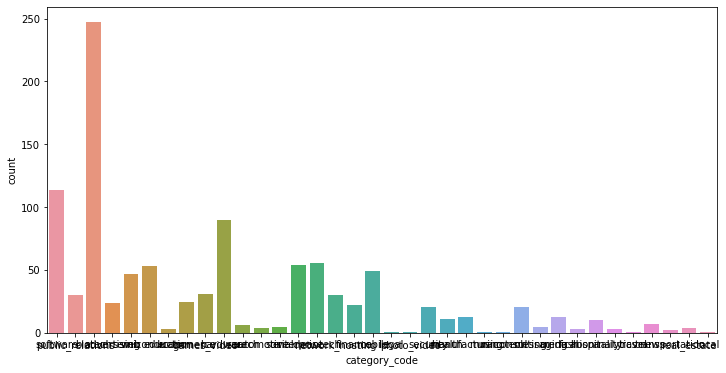

In [86]:
db_operating=db[db['status']=='ipo']
db_operating=db_operating[db_operating['category_code']!='other']

sns.countplot(db_operating['category_code'])

In [87]:
db_operating['category_code'].value_counts()

biotech             247
software            114
hardware             90
cleantech            56
enterprise           54
semiconductor        53
mobile               49
web                  47
games_video          31
public_relations     30
network_hosting      30
ecommerce            25
advertising          24
finance              22
security             21
consulting           21
medical              13
manufacturing        13
health               11
hospitality          10
news                  7
search                6
messaging             5
social                5
automotive            4
real_estate           4
education             3
fashion               3
analytics             3
transportation        2
travel                1
legal                 1
nanotech              1
music                 1
photo_video           1
local                 1
Name: category_code, dtype: int64

<AxesSubplot:xlabel='category_code', ylabel='count'>

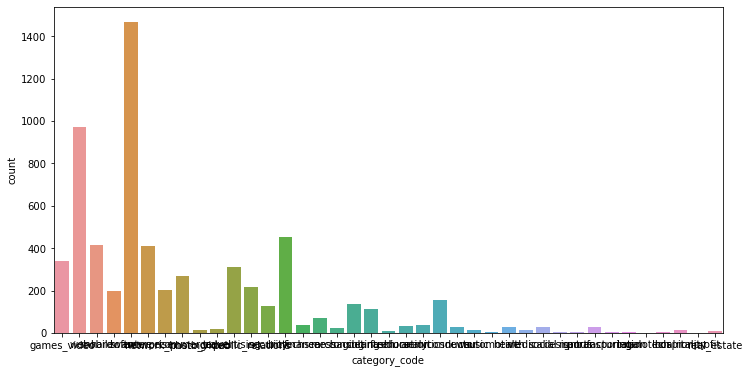

In [88]:
db_operating=db[db['status']=='acquired']
db_operating=db_operating[db_operating['category_code']!='other']

sns.countplot(db_operating['category_code'])

In [89]:
db_operating['category_code'].value_counts()

software            1466
web                  971
biotech              455
mobile               416
enterprise           409
games_video          342
advertising          312
ecommerce            271
public_relations     215
network_hosting      201
hardware             200
semiconductor        154
consulting           136
security             127
cleantech            115
search                70
finance               40
analytics             39
education             33
manufacturing         30
news                  27
health                27
social                27
messaging             24
travel                20
medical               16
music                 15
hospitality           13
photo_video           12
fashion               11
real_estate            8
transportation         7
sports                 5
automotive             5
design                 4
legal                  4
local                  3
nanotech               1
nonprofit              1
Name: category_code, dtyp

<AxesSubplot:xlabel='category_code', ylabel='count'>

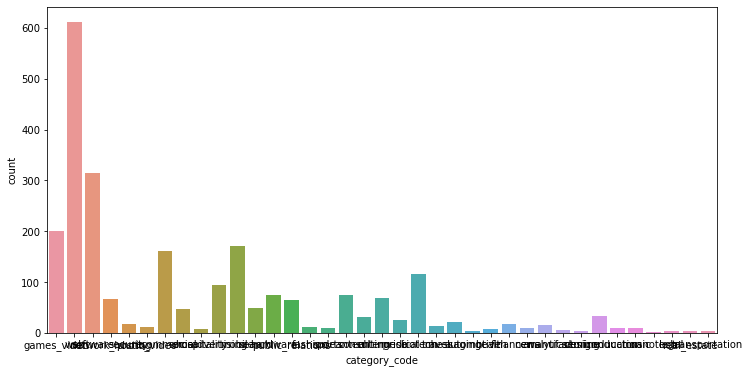

In [90]:
db_operating=db[db['status']=='closed']
db_operating=db_operating[db_operating['category_code']!='other']

sns.countplot(db_operating['category_code'])

In [91]:
db_operating['category_code'].value_counts()

web                 611
software            314
games_video         201
mobile              172
ecommerce           161
biotech             117
advertising          95
hardware             75
cleantech            74
enterprise           68
network_hosting      66
public_relations     65
search               49
social               48
semiconductor        34
consulting           31
medical              26
messaging            22
finance              18
security             17
analytics            15
travel               13
photo_video          12
fashion              11
news                 10
education            10
music                 9
sports                9
health                8
hospitality           7
manufacturing         5
legal                 4
automotive            4
design                3
real_estate           3
transportation        3
nanotech              1
Name: category_code, dtype: int64

In [92]:
#now lets plot graph of top 10 category code with status
db['category_code'].value_counts()

other               86984
software            17922
web                 15118
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
hospitality           768
news                  768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                281
nonprofit   

operating    16028
acquired      1466
closed         314
ipo            114
Name: status, dtype: int64


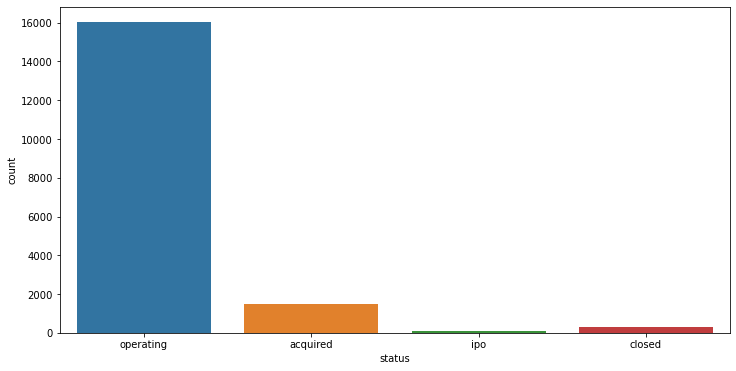

In [93]:
db_category=db[db['category_code']=='software']
sns.countplot(db_category['status'])
print(db_category['status'].value_counts())

most of the software category companies are operating


operating    83504
acquired      3162
closed         193
ipo            125
Name: status, dtype: int64


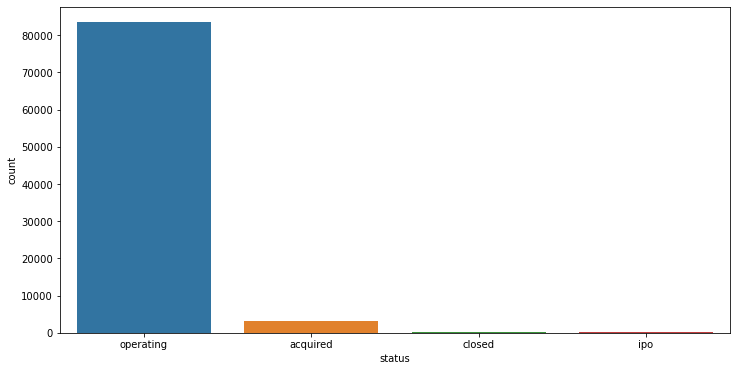

In [94]:
db_category=db[db['category_code']=='other']
sns.countplot(db_category['status'])
print(db_category['status'].value_counts())

operating    13489
acquired       971
closed         611
ipo             47
Name: status, dtype: int64


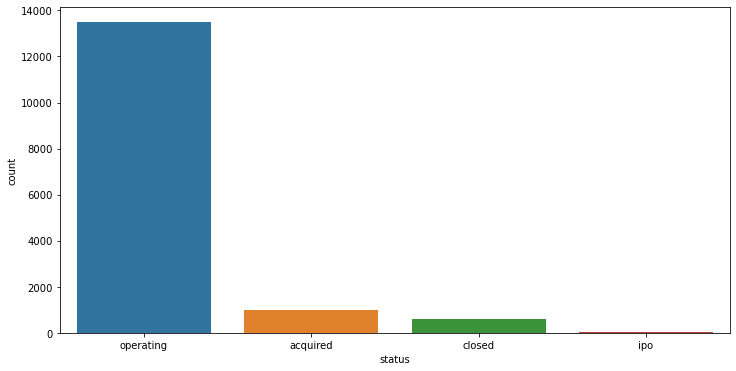

In [95]:
db_category=db[db['category_code']=='web']
sns.countplot(db_category['status'])
print(db_category['status'].value_counts())

operating    8608
acquired      271
closed        161
ipo            25
Name: status, dtype: int64


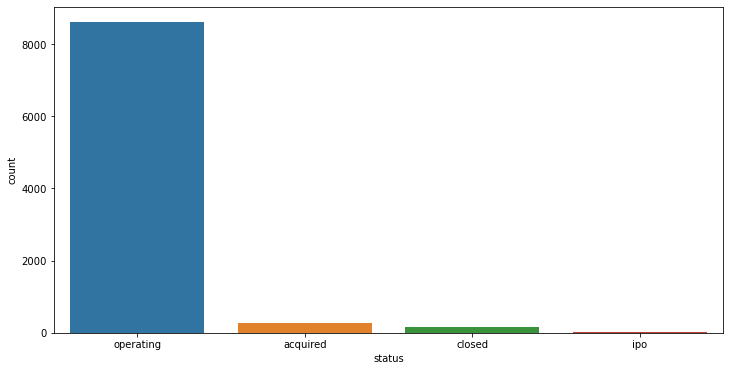

In [96]:
db_category=db[db['category_code']=='ecommerce']
sns.countplot(db_category['status'])
print(db_category['status'].value_counts())

operating    6946
acquired      342
closed        201
ipo            31
Name: status, dtype: int64


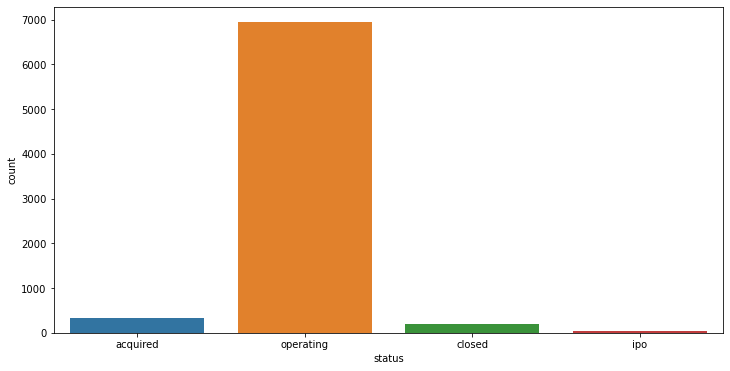

In [97]:
db_category=db[db['category_code']=='games_video']
sns.countplot(db_category['status'])
print(db_category['status'].value_counts())


operating    6225
acquired      416
closed        172
ipo            49
Name: status, dtype: int64


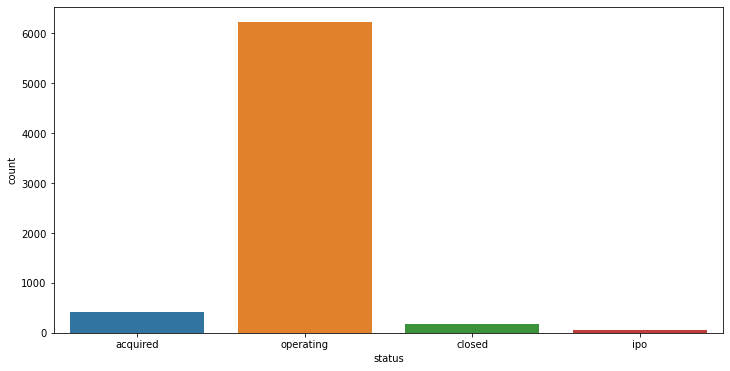

In [98]:
db_category=db[db['category_code']=='mobile']
sns.countplot(db_category['status'])
print(db_category['status'].value_counts())

In [99]:
#now cheching status column with region
db['region'].value_counts()

unknown           109866
SF Bay             10173
New York            5174
London              4065
Los Angeles         4057
                   ...  
Hersham                1
Harwell                1
Puerto Andratx         1
Paarl                  1
D.I.Khan               1
Name: region, Length: 5847, dtype: int64

operating    8250
acquired     1365
closed        395
ipo           163
Name: status, dtype: int64


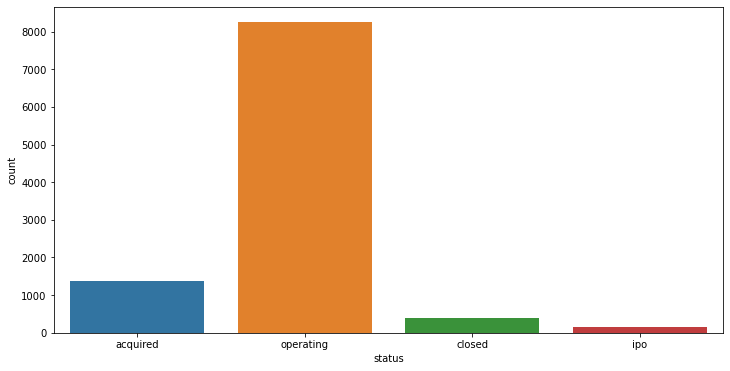

In [100]:
db_category=db[db['region']=='SF Bay']
sns.countplot(db_category['status'])
print(db_category['status'].value_counts())

operating    4583
acquired      401
closed        130
ipo            60
Name: status, dtype: int64


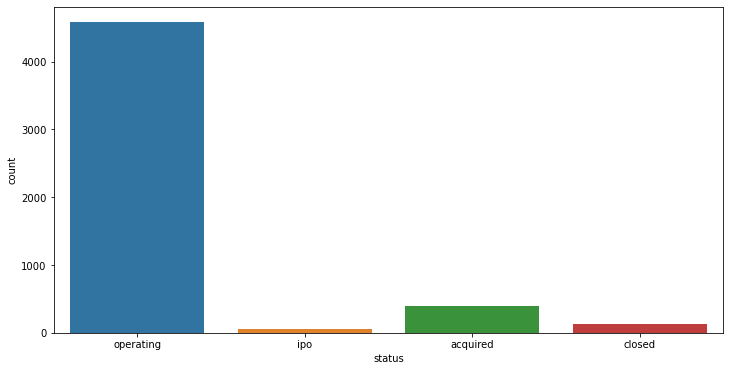

In [101]:
db_category=db[db['region']=='New York']
sns.countplot(db_category['status'])
print(db_category['status'].value_counts())

In [102]:
# grouping by with milestone and status
db.groupby(['status']).mean()

,funding_rounds,funding_total_usd,milestones,relationships,active_days,isclosed,logo_area
status,,,,,,,
acquired,1.971471,1.660940e+07,0.757931,4.660847,3267.197466,0.0,100488.124037
closed,1.501548,1.041845e+07,0.782121,3.096749,1298.689241,1.0,186134.060685
ipo,2.227513,5.071703e+07,1.578483,23.521164,5876.816578,0.0,46245.598069
operating,1.948267,1.456473e+07,0.539972,2.682159,1811.213218,0.0,194846.646308


In [103]:
db.groupby(['region']).mean()

,funding_rounds,funding_total_usd,milestones,relationships,active_days,isclosed,logo_area
region,,,,,,,
?stanbul / Ata?ehir,2.000,14816520.0,0.000000,3.000000,944.000,0.0,43050.000000
A Coru,2.000,14816520.0,1.000000,3.000000,1447.500,0.0,19987.500000
A Coruña,2.000,14816520.0,0.000000,3.000000,2439.000,0.0,46733.000000
AC Joure,2.000,14816520.0,0.000000,3.000000,907.000,0.0,23628.000000
ACT,2.000,14816520.0,0.000000,3.000000,1526.000,0.0,17712.000000
...,...,...,...,...,...,...,...
wilkes barre,1.875,13293640.0,0.375000,1.625000,2881.375,0.0,95136.016250
xiamen,1.750,13612390.0,0.000000,2.500000,4789.500,0.0,80410.750000
yahud,2.000,14816520.0,0.000000,2.000000,2067.000,0.0,102262.130000


## Feature Engineering

steps involved in feature Engineering
1. Handling missing values
2. Handling imbalanced data
3. Handling outliers
4. Binning
5. Encoding
6. Feature Scaling
7. Feature Selection

### Handling missing values
we have already handled missing data

### Encoding 
we will do encoding first because our data contains lot of categorical variable

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
le = LabelEncoder()

In [106]:
db['category_code'].value_counts()

other               86984
software            17922
web                 15118
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
hospitality           768
news                  768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                281
nonprofit   

In [107]:
db['category_code']=le.fit_transform(db['category_code'])+1

In [108]:
db['country_code']=le.fit_transform(db['country_code'])+1
db['state_code']=le.fit_transform(db['state_code'])+1
db['city']=le.fit_transform(db['city'])+1
db['region']=le.fit_transform(db['region'])+1

In [109]:
db['status'].value_counts()

operating    183441
acquired       9394
closed         2584
ipo            1134
Name: status, dtype: int64

In [110]:
db['status']=le.fit_transform(db['status'])+1

1. operating->4
2. acquired ->1
3. closed   ->2
4. ipo      ->3 

In [111]:
db.head()

,category_code,status,country_code,state_code,city,region,funding_rounds,funding_total_usd,milestones,relationships,active_days,isclosed,logo_area,tags
0,42,4,165,48,8217,4596,3.0,39750000.0,5.0,17.0,3271,0,21654.00,Technology Platform Company Wetpaint is a tec...
1,13,1,165,5,2185,2887,2.0,14816520.0,0.0,6.0,2679,0,15810.00,Flektor is a rich-media mash-up platform tha...
2,13,1,165,5,8011,4330,2.0,14816520.0,4.0,12.0,2612,0,3638.00,There.com is an online virtual world where a...
3,26,4,176,52,10617,5834,2.0,14816520.0,0.0,3.0,2258,0,102262.13,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,F..."
4,13,4,176,52,10617,5834,2.0,14816520.0,0.0,3.0,2258,0,14800.00,This company shows free movies online on the...


In [112]:
db.drop(columns='tags',inplace=True)

In [113]:
db.head()

,category_code,status,country_code,state_code,city,region,funding_rounds,funding_total_usd,milestones,relationships,active_days,isclosed,logo_area
0,42,4,165,48,8217,4596,3.0,39750000.0,5.0,17.0,3271,0,21654.00
1,13,1,165,5,2185,2887,2.0,14816520.0,0.0,6.0,2679,0,15810.00
2,13,1,165,5,8011,4330,2.0,14816520.0,4.0,12.0,2612,0,3638.00
3,26,4,176,52,10617,5834,2.0,14816520.0,0.0,3.0,2258,0,102262.13
4,13,4,176,52,10617,5834,2.0,14816520.0,0.0,3.0,2258,0,14800.00


### Adding two new columns funding usd per round and funding usd per day

In [117]:
funding_total=list(db['funding_total_usd'])
active_days=list(db['active_days'])
funding_round=list(db['funding_rounds'])
funding_per_round=list()
funding_per_days=list()
for i in range(len(funding_total)):
    if funding_round[i]==0:
        funding_per_round.append(0)
    else:
        funding_per_round.append(funding_total[i]/funding_round[i])
    if active_days[i]==0: 
        funding_per_days.append(0)
    else:
        funding_per_days.append(funding_total[i]/active_days[i])
db['funding_per_days']=funding_per_days
db['funding_per_round']=funding_per_round
db

,category_code,status,country_code,state_code,city,region,funding_rounds,funding_total_usd,milestones,relationships,active_days,isclosed,logo_area,funding_per_days,funding_per_round
0,42,4,165,48,8217,4596,3.0,39750000.0,5.0,17.0,3271,0,21654.00,12152.247019,13250000.0
1,13,1,165,5,2185,2887,2.0,14816520.0,0.0,6.0,2679,0,15810.00,5530.615901,7408260.0
2,13,1,165,5,8011,4330,2.0,14816520.0,4.0,12.0,2612,0,3638.00,5672.480858,7408260.0
3,26,4,176,52,10617,5834,2.0,14816520.0,0.0,3.0,2258,0,102262.13,6561.789194,7408260.0
4,13,4,176,52,10617,5834,2.0,14816520.0,0.0,3.0,2258,0,14800.00,6561.789194,7408260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,8,4,165,5,7974,4330,2.0,14816520.0,2.0,5.0,2830,0,10800.00,5235.519435,7408260.0
196549,32,4,165,5,7994,4330,1.0,750000.0,1.0,14.0,2526,0,138306.00,296.912114,750000.0
196550,6,4,165,46,2894,5456,2.0,14816520.0,3.0,44.0,20362,0,1980.00,727.655437,7408260.0
196551,34,4,165,5,5143,2887,2.0,14816520.0,0.0,1.0,2283,0,19780.00,6489.934297,7408260.0


### Feature Selection
Correlation Matrix with Heatmap

<AxesSubplot:>

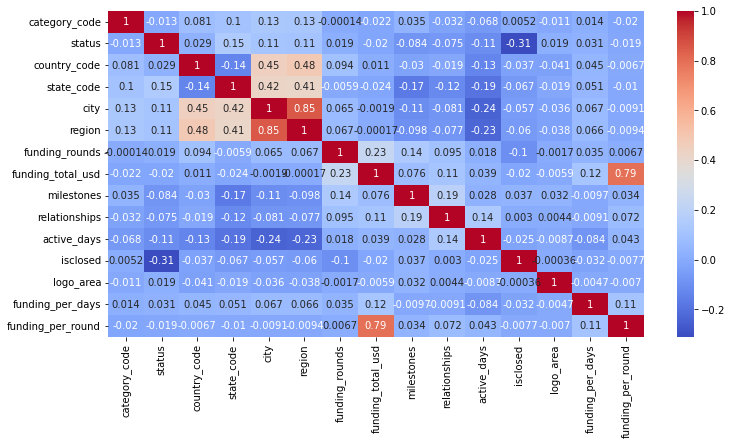

In [118]:
sns.heatmap(db.corr(),annot = True, fmt='.2g',cmap= 'coolwarm')

as we can see city and region are highly related so we will drop one these column

In [119]:
db.drop(columns="region",inplace=True)

Before moving forward lets divide our data in independent and dependent feature

In [120]:
new=db[db['active_days']>=0]
x=new.drop(columns='status')
y=new['status']

In [121]:
x

,category_code,country_code,state_code,city,funding_rounds,funding_total_usd,milestones,relationships,active_days,isclosed,logo_area,funding_per_days,funding_per_round
0,42,165,48,8217,3.0,39750000.0,5.0,17.0,3271,0,21654.00,12152.247019,13250000.0
1,13,165,5,2185,2.0,14816520.0,0.0,6.0,2679,0,15810.00,5530.615901,7408260.0
2,13,165,5,8011,2.0,14816520.0,4.0,12.0,2612,0,3638.00,5672.480858,7408260.0
3,26,176,52,10617,2.0,14816520.0,0.0,3.0,2258,0,102262.13,6561.789194,7408260.0
4,13,176,52,10617,2.0,14816520.0,0.0,3.0,2258,0,14800.00,6561.789194,7408260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,8,165,5,7974,2.0,14816520.0,2.0,5.0,2830,0,10800.00,5235.519435,7408260.0
196549,32,165,5,7994,1.0,750000.0,1.0,14.0,2526,0,138306.00,296.912114,750000.0
196550,6,165,46,2894,2.0,14816520.0,3.0,44.0,20362,0,1980.00,727.655437,7408260.0
196551,34,165,5,5143,2.0,14816520.0,0.0,1.0,2283,0,19780.00,6489.934297,7408260.0


In [122]:
y

0         4
1         1
2         1
3         4
4         4
         ..
196548    4
196549    4
196550    4
196551    4
196552    4
Name: status, Length: 196402, dtype: int32

### Univariate selection
 Statistical tests can be used to select the independent features which have the strongest relationship with the dependent feature. SelectKBest method can be used with a suite of different statistical tests to select a specific number of features.

In [123]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures=SelectKBest(score_func=chi2,k=11)
fit = bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfvalues=pd.DataFrame(x.columns)
featureScores=pd.concat([dfscores,dfvalues],axis=1)


In [124]:
featureScores

,0,0
0,2.095409e+03,category_code
1,4.433771e+03,country_code
2,3.098109e+04,state_code
3,3.773929e+06,city
4,2.870158e+02,funding_rounds
5,1.047506e+11,funding_total_usd
6,3.149129e+03,milestones
7,1.791936e+05,relationships
8,1.978485e+07,active_days
9,1.939660e+05,isclosed


we can see factors which highly affect our status: the more the score the more influence it have

### Handling imbalanced data 

we can see our dataset is highly imbalanced most of the values in status columns are opeation

##### Under-sampling majority class

Under-sampling the majority class will resample the majority class points in the data to make them equal to the minority class.

In [125]:
#pip install imblearn

In [126]:
from imblearn.under_sampling import RandomUnderSampler
sam = RandomUnderSampler(random_state=0)
x_resampled_under,y_resampled_under = sam.fit_resample(x,y)

In [127]:
x_resampled_under

,category_code,country_code,state_code,city,funding_rounds,funding_total_usd,milestones,relationships,active_days,isclosed,logo_area,funding_per_days,funding_per_round
0,29,176,52,10617,2.0,14816520.0,0.0,3.0,356,0,102262.13,41619.438202,7408260.0
1,29,165,31,6480,2.0,14816520.0,0.0,3.0,1526,0,22560.00,9709.384010,7408260.0
2,38,165,5,7955,1.0,6000000.0,0.0,1.0,3560,0,5600.00,1685.393258,6000000.0
3,38,165,21,3192,2.0,14816520.0,0.0,3.0,11596,0,32400.00,1277.726802,7408260.0
4,4,165,52,2880,2.0,14816520.0,0.0,1.0,8674,0,37875.00,1708.153101,7408260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,42,165,35,6279,2.0,14816520.0,1.0,11.0,1583,0,93987.00,9359.772584,7408260.0
4532,23,165,10,5679,2.0,14816520.0,1.0,3.0,3966,0,676200.00,3735.885023,7408260.0
4533,27,176,52,10617,2.0,14816520.0,0.0,3.0,411,0,102262.13,36049.927007,7408260.0
4534,29,176,52,10617,2.0,14816520.0,1.0,4.0,481,0,102262.13,30803.575884,7408260.0


# PCA (Principal Component Analysis) 

is a widely used technique for dimensionality reduction and feature extraction. The main steps of PCA are as follows:

Data preparation: First, the data must be prepared by ensuring that it is in numerical format and that any missing values have been handled. If the data contains categorical variables, they need to be encoded into numerical form.

Data standardization: PCA works best when the variables are on the same scale, so it is recommended to standardize the data by subtracting the mean and dividing by the standard deviation.

Covariance matrix computation: The next step is to compute the covariance matrix, which measures the linear relationship between the variables in the data. The covariance matrix is computed by multiplying the transpose of the standardized data matrix by the standardized data matrix itself.

Eigendecomposition of the covariance matrix: The next step is to perform an eigendecomposition of the covariance matrix to obtain the eigenvalues and eigenvectors. The eigenvalues represent the variance of each principal component, while the eigenvectors represent the direction of the principal component.

Selecting principal components: The next step is to select the principal components based on the eigenvalues. A common approach is to select the top k components that explain the most variance in the data. The total variance explained by the selected components should be close to 100%.

Transforming data: The final step is to transform the data into the new space defined by the selected principal components. This is done by multiplying the standardized data matrix by the matrix of eigenvectors corresponding to the selected components.

By following these steps, PCA can reduce the dimensionality of the data while preserving most of the information in the original data.

In [128]:
from sklearn.preprocessing import StandardScaler


In [129]:
scaler=StandardScaler()

In [130]:
x=scaler.fit_transform(x)

In [131]:
x

array([[ 1.46507756,  0.27567582,  0.25882824, ..., -0.15974138,
        -0.14343941,  0.39568169],
       [-1.0940281 ,  0.27567582, -2.45539227, ..., -0.16530451,
        -0.31188456, -0.01289346],
       [-1.0940281 ,  0.27567582, -2.45539227, ..., -0.17689152,
        -0.30827571, -0.01289346],
       ...,
       [-1.71174325,  0.27567582,  0.13258542, ..., -0.17846984,
        -0.43406524, -0.01289346],
       [ 0.75911738,  0.27567582, -2.45539227, ..., -0.16152531,
        -0.28748082, -0.01289346],
       [-1.53525321,  0.27567582, -2.45539227, ..., -0.16190609,
        -0.44790499, -0.49781024]])

In [132]:
from sklearn.decomposition import PCA

In [133]:
pca=PCA(n_components=2)

In [134]:
pca.fit(x)

PCA(n_components=2)

In [135]:
x_transform=pca.transform(x)

In [136]:
print("Original data shape:", x.shape)
print("Transformed data shape:", x_transform.shape)
print("PCA components:", pca.components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Original data shape: (196402, 13)
Transformed data shape: (196402, 2)
PCA components: [[-0.01396701  0.0646041  -0.03021308  0.03539809  0.22383448  0.65378674
   0.12547166  0.16245157  0.01817606 -0.02932364 -0.01070571  0.3077317
   0.61464551]
 [ 0.19648554  0.33944506  0.42493813  0.58219681  0.02459536 -0.03030408
  -0.2190475  -0.23223307 -0.39360994 -0.0769742  -0.05704031  0.241442
  -0.02839051]]
Explained variance ratio: [0.1526007  0.14765939]


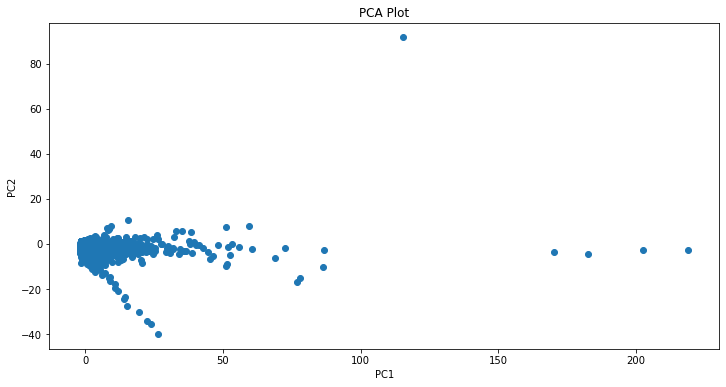

In [137]:
plt.scatter(x_transform[:, 0], x_transform[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')

plt.show()

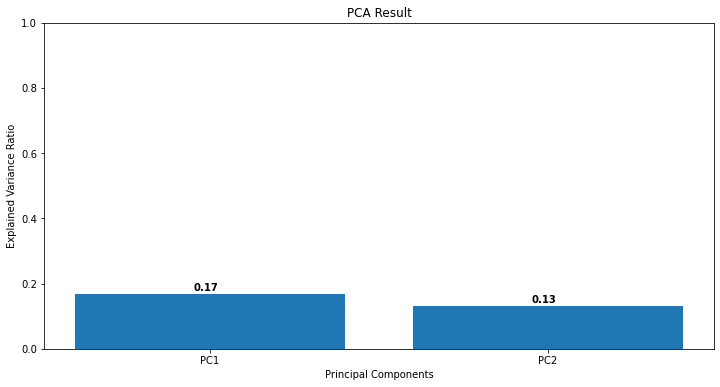

In [138]:
components = ['PC1', 'PC2']
variances = [0.16928697, 0.13205727]

# plot the bar graph
fig, ax = plt.subplots()
ax.bar(components, variances)

# add annotations to the bars
for i, v in enumerate(variances):
    ax.text(i-0.05, v+0.01, str(round(v, 2)), color='black', fontweight='bold')

plt.ylim(0, 1)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Result')

plt.show()


### Modeling


### Logistic Regression


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2,shuffle=True)

In [141]:
lr=LogisticRegression()

In [142]:
lr.fit(x_train,y_train)

LogisticRegression()

In [143]:
lr_pred=lr.predict(x_test)

In [144]:
lr_accuracy=accuracy_score(y_test,lr_pred)

In [145]:
lr_accuracy

0.9453170744125658

### Naive bayes

In [146]:
from sklearn.naive_bayes import GaussianNB

In [147]:
gnb= GaussianNB()

In [149]:
gnb.fit(x_train,y_train)

GaussianNB()

In [150]:
gnb_pred=gnb.predict(x_test)

In [151]:
gnb_accuracy=accuracy_score(y_test,gnb_pred)
gnb_accuracy

0.9172882564089508